### Download BCH dataset

Note: if you want to download part of the data on line 36 edit "folderlist[5:]"

For example if you want the data for patient 1 through 3 do "folderlist[0:3]"

Index starts at 0 unlike Matlab and the 2nd number is not inclusive
   
e.g. array[0:3] == [array[0], array[1], array[2]]

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib import urlopen, urlretrieve
import re
import os

def create_folder(directory):
    """ Creates directory if it doesn't not exist """
    if not os.path.exists(directory):
        os.makedirs(directory)

def get_href(url):
    """ Returns a list of all href in a url """
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    return soup.findAll('a', href=True)

url = 'https://physionet.org/pn6/chbmit/'

# Location for storing the data
data_folder = '/'.join(os.getcwd().split('/')[:-1]) + '/ANES212_data/'
create_folder(data_folder)

# Compile a list of files and folders
filelist = []
folderlist = []
for x in get_href(url):
    temp = x['href']
    if re.match(r'^\w+$', temp[0]) and 'http' not in temp and '.pdf' not in temp and '.org' not in temp:
        if '/' in temp:
            folderlist.append(temp)
        else:
            urlretrieve(url + temp, data_folder + temp)

# For each folder download data
for folder in folderlist: # Replace this
    temp_url = url + folder
    temp_data_folder = data_folder + folder
    
    # Create folder to store the data if it doesn't exist
    create_folder(temp_data_folder)
    
    r = requests.get(temp_url)
    soup = BeautifulSoup(r.text, "html.parser")
    temp_filelist = []
    for x in get_href(temp_url):
        temp = x['href']
        if re.match(r'^\w+$', temp[0]) and '.org' not in temp:
            urlretrieve(temp_url + temp, temp_data_folder + temp)

### Testing data visualization

In [4]:
import pyedflib
import numpy as np
import os

data_folder = '/'.join(os.getcwd().split('/')[:-1]) + '/ANES212_data/'
data_file = 'chb04_05.edf'
print data_folder + data_file
f = pyedflib.EdfReader(data_folder + data_file)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

/mnt/c/Users/choec/Documents/GitHub/ANES212_data/chb04_05.edf


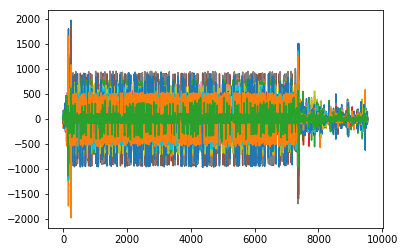

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(sigbufs.shape[0]):
    plt.plot(sigbufs[i,:][::256])
plt.show()